# **Handling Outliers**

## **IQR method for skewed data**

In [44]:
import pandas as pd
import numpy as np

In [45]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


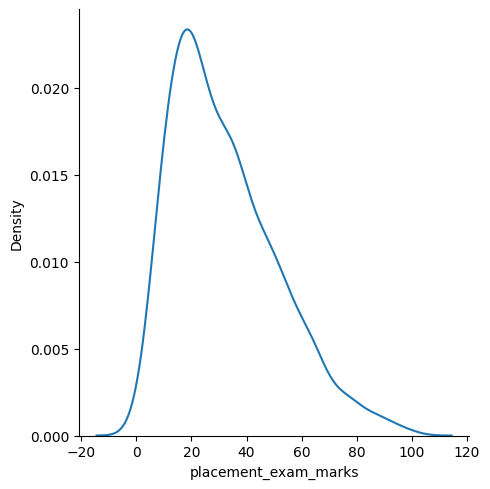

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(df['placement_exam_marks'],kind='kde')
plt.show()

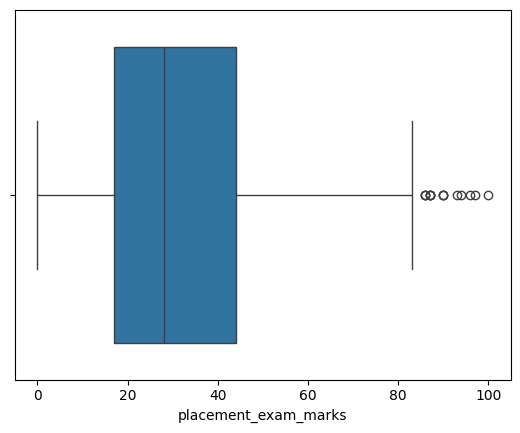

In [47]:
sns.boxplot(df['placement_exam_marks'],orient='y')
plt.show()

### Finding Q2 (50th percentile)

In [48]:
Q2 = df['placement_exam_marks'].quantile(0.50)

### Finding Q1 (25th percentile)

In [49]:
Q1 = df['placement_exam_marks'].quantile(0.25)

### Finding Q3 (75th percentile)

In [50]:
Q3 = df['placement_exam_marks'].quantile(0.75)

### Finding IQR

In [51]:
IQR = Q3 - Q1

### **Minimum Bound**

In [52]:
minimum = Q1 - (1.5*IQR)

### **Maximum Bound**

In [53]:
maximum = Q3 + (1.5*IQR)

## **Trimming**

In [54]:
df[(df['placement_exam_marks'] > minimum) & (df['placement_exam_marks'] < maximum)]

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


## **Capping**

In [55]:
df['placement_exam_marks'] = np.where(
    df['placement_exam_marks'] < minimum, 
    minimum, 
    np.where(df['placement_exam_marks'] > maximum, 
            maximum,
            df['placement_exam_marks'])
)

In [56]:
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


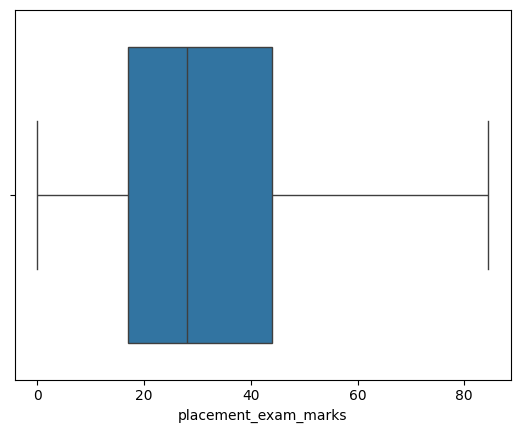

In [57]:
sns.boxplot(df['placement_exam_marks'],orient='y')
plt.show()